In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('customer_purchase_data.csv')

In [5]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [9]:
#sns.pairplot(df)

<Axes: xlabel='PurchaseStatus', ylabel='count'>

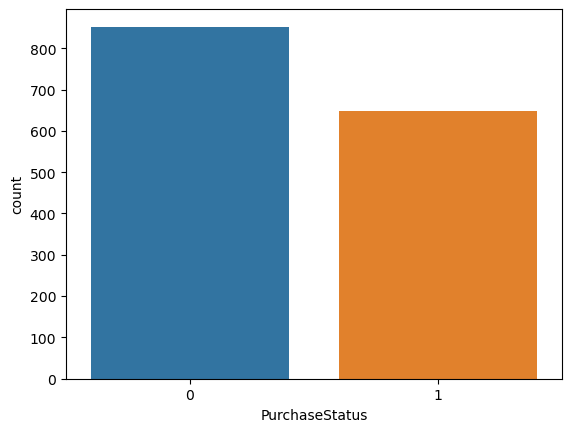

In [10]:
sns.countplot(x='PurchaseStatus',data=df)

<Axes: >

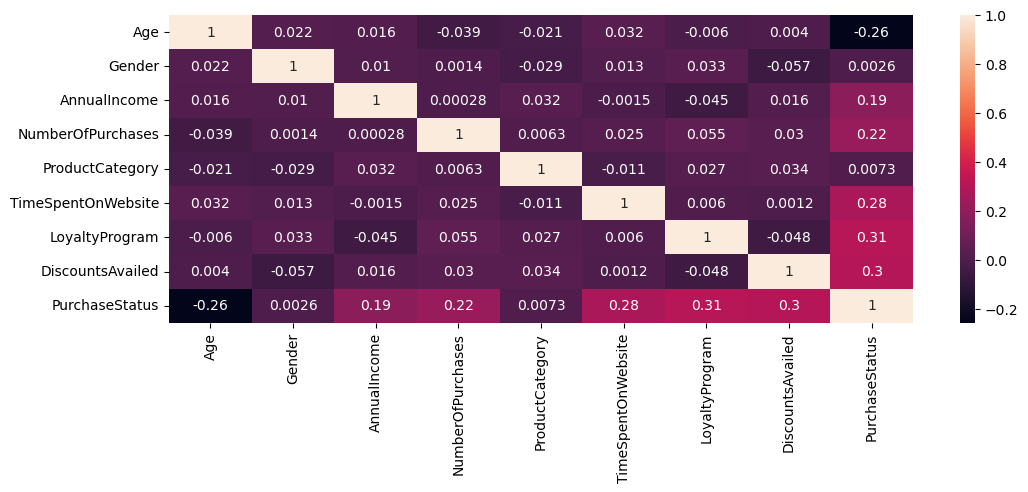

In [17]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

In [22]:
corr_status=df.corr()['PurchaseStatus'].sort_values()

<Axes: >

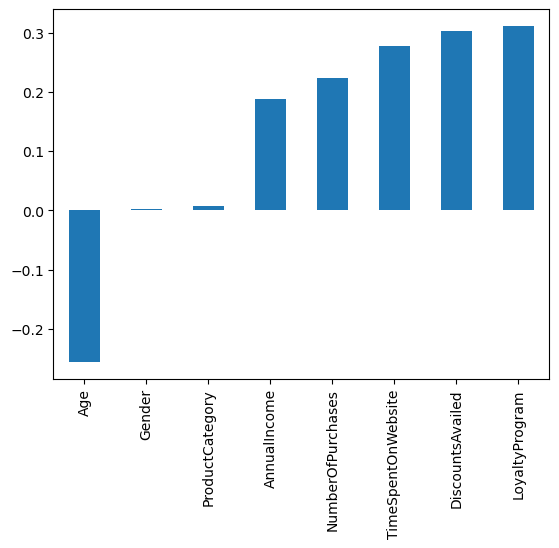

In [25]:
corr_status[:-1].plot(kind='bar')

<Axes: xlabel='NumberOfPurchases', ylabel='Count'>

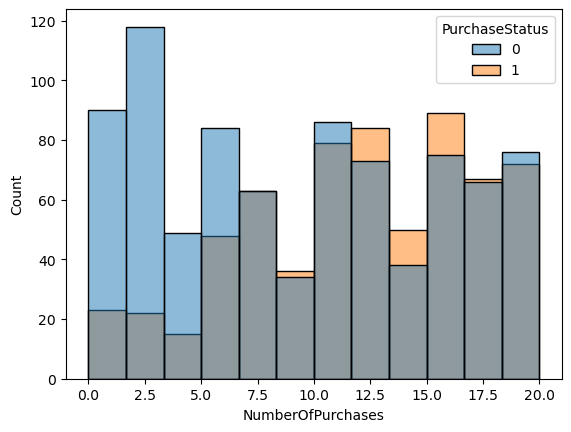

In [32]:
sns.histplot(x='NumberOfPurchases', data=df,hue='PurchaseStatus')

<Axes: xlabel='Age', ylabel='Count'>

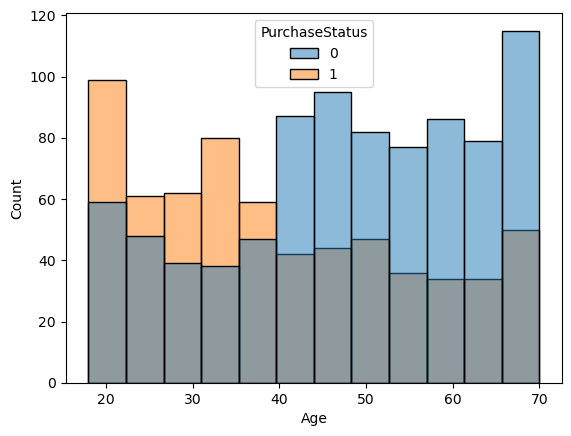

In [39]:
sns.histplot(data=df,x='Age',hue='PurchaseStatus')

<Axes: xlabel='ProductCategory', ylabel='count'>

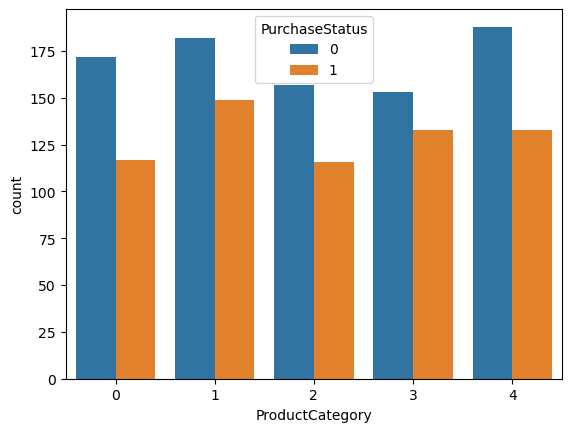

In [44]:
sns.countplot(x='ProductCategory',data=df,hue='PurchaseStatus')

<Axes: xlabel='Gender', ylabel='count'>

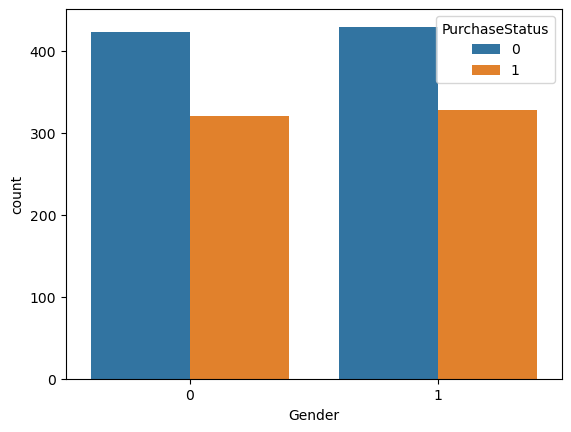

In [45]:
sns.countplot(x='Gender',data=df,hue='PurchaseStatus')

In [46]:
df.drop('Gender',axis=1,inplace=True)
df.drop('ProductCategory',axis=1,inplace=True)

In [47]:
df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,66120.267939,8,30.568601,0,5,1
1,20,23579.773583,4,38.240097,0,5,0
2,27,127821.306432,11,31.633212,1,0,1
3,24,137798.623120,19,46.167059,0,4,1
4,31,99300.964220,19,19.823592,0,0,1
...,...,...,...,...,...,...,...
1495,39,65048.141834,13,34.590743,0,5,1
1496,67,28775.331069,18,17.625707,0,1,1
1497,40,57363.247541,7,12.206033,0,0,0
1498,63,134021.775532,16,37.311634,1,0,1


In [48]:
X=df.drop('PurchaseStatus',axis=1)
y=df['PurchaseStatus']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.01939315,  0.54936278, -1.45058677,  0.83368399,  1.4295028 ,
        -0.93111916],
       [-0.8256212 , -0.68126   , -0.42606921,  0.80981115, -0.69954392,
         0.2489353 ],
       [-0.25303054, -0.50228173, -0.42606921, -0.02045915, -0.69954392,
         1.42898976],
       ...,
       [-1.46183305,  0.0231774 , -0.25531628,  0.81173659, -0.69954392,
        -0.93111916],
       [ 0.31956012,  1.57142169, -0.25531628,  1.64316906, -0.69954392,
        -1.52114639],
       [-1.08010594, -0.85564171, -1.27983384, -1.31940957, -0.69954392,
         0.2489353 ]])

In [55]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

C:\Users\27606\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
#Predictions for logistics model
log_pred=logistic_model.predict(X_test)

Accuracy information not found in classification report.


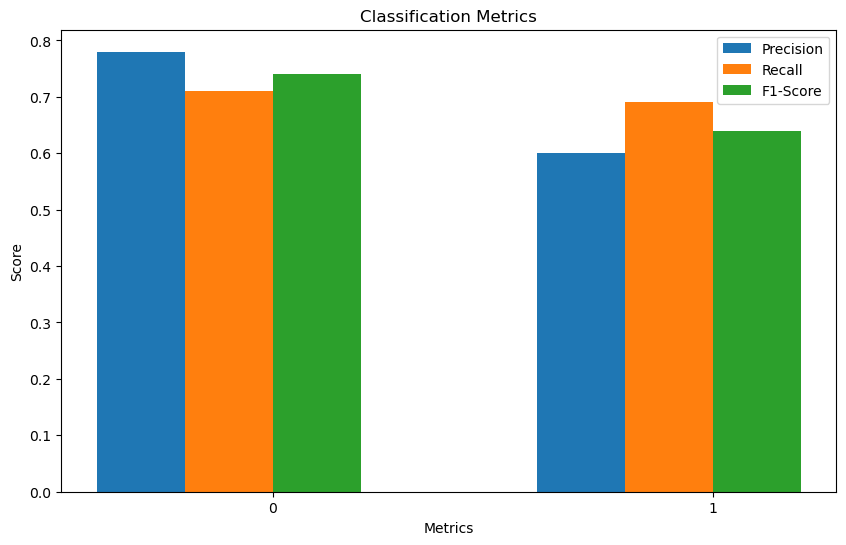

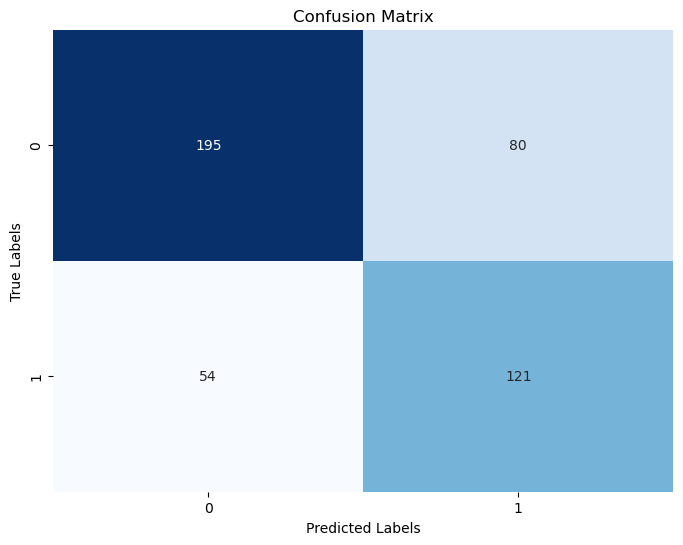

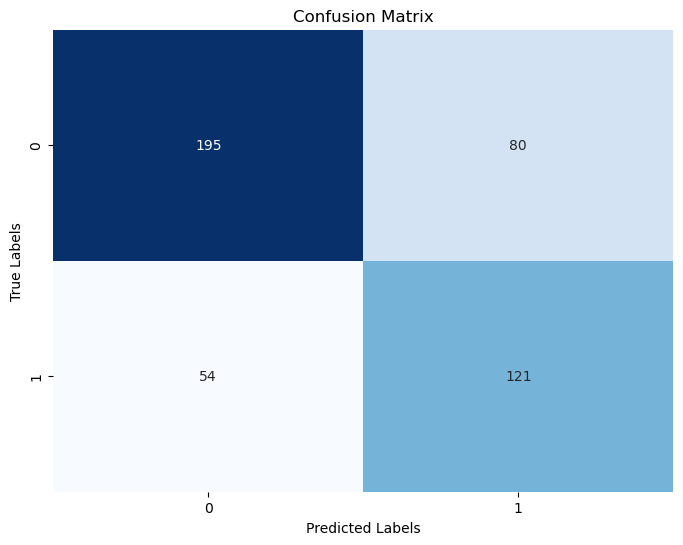

In [152]:
#Evaluation
from sklearn.metrics import classification_report,confusion_matrix
log_class_report=classification_report(y_test,log_pred)
log_cm=confusion_matrix(y_test,log_pred)

plot_classification_report(log_class_report)
plot_confusion_matrix(log_cm)



In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [60]:
#Predictions for random forest model
rf_pred=rfc.predict(X_test)

Accuracy information not found in classification report.


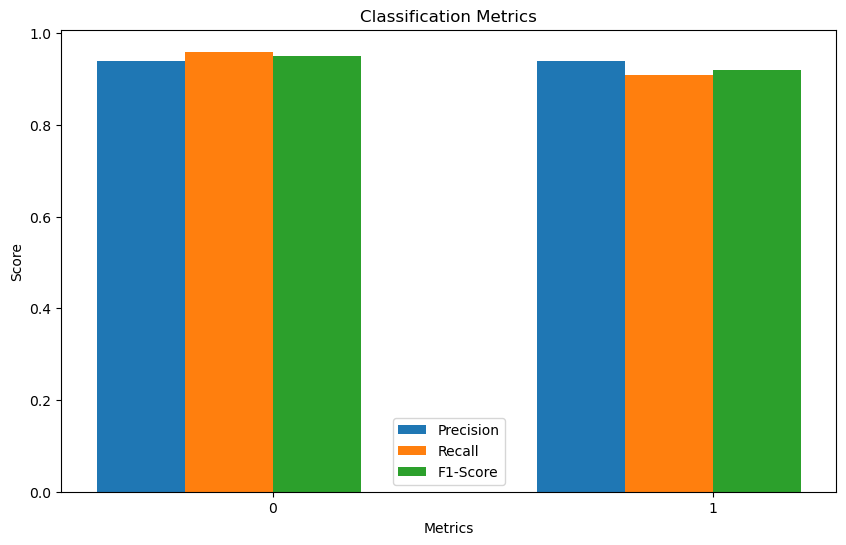

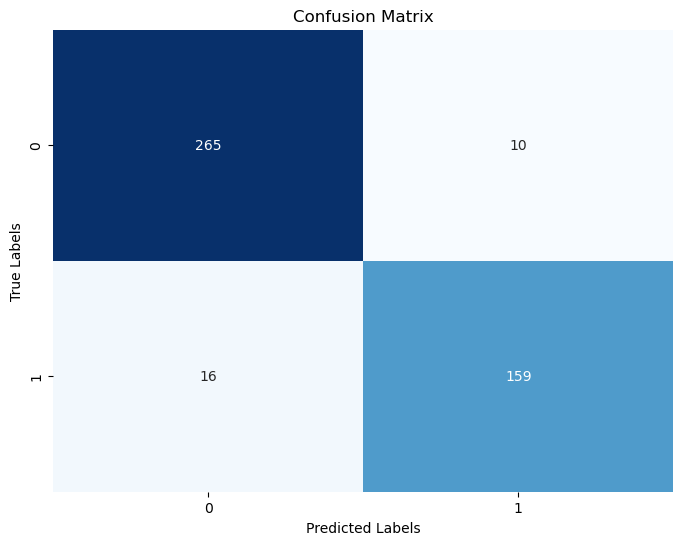

In [151]:
#Evaluation
rf_class_report=classification_report(y_test,rf_pred)
rf_cm=confusion_matrix(y_test,rf_pred)

plot_classification_report(rf_class_report)
plot_confusion_matrix(rf_cm)



In [87]:
from sklearn.neighbors import KNeighborsClassifier
cnn_model=KNeighborsClassifier(n_neighbors=4)
cnn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [88]:
#Predictions for knearestneigbor
cnn_pred=cnn_model.predict(X_test)

Accuracy information not found in classification report.


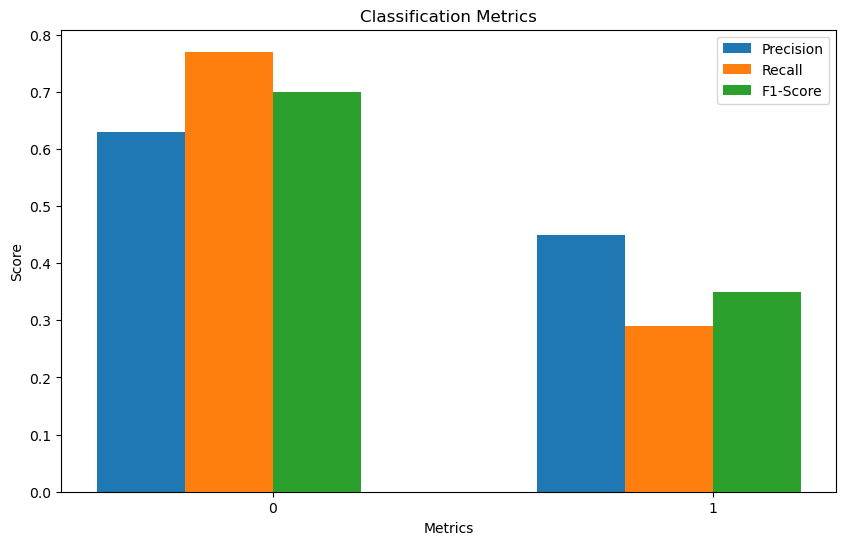

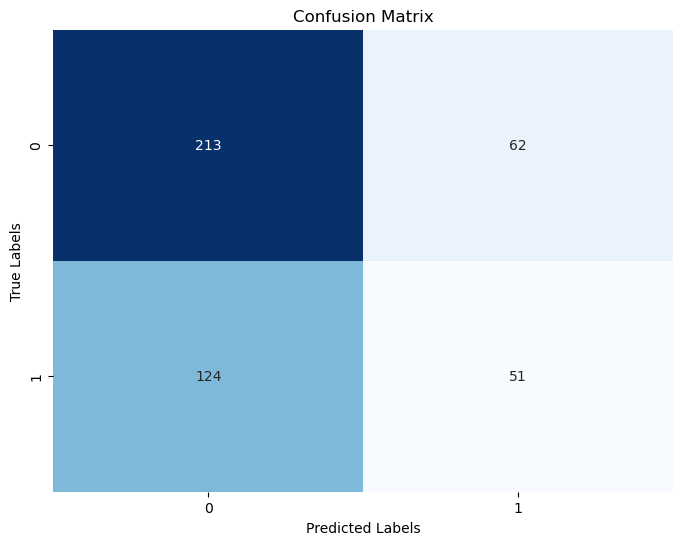

In [150]:
#Evaluation
cnn_class_report=classification_report(y_test,cnn_pred)
cnn_cm=confusion_matrix(y_test,cnn_pred)

plot_classification_report(cnn_class_report)
plot_confusion_matrix(cnn_cm)



In [96]:
from sklearn.model_selection import GridSearchCV
grid_parameters={'C':[1000,100,10,1,0.1,0.01,0.001],'gamma':[1000,100,10,1,0.1,0.01,0.001]}
grid=GridSearchCV(SVC(),grid_parameters)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                         'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001]})

In [90]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [101]:
#Predictions for Support Vector
svc_pred=grid.predict(X_test)

Accuracy information not found in classification report.


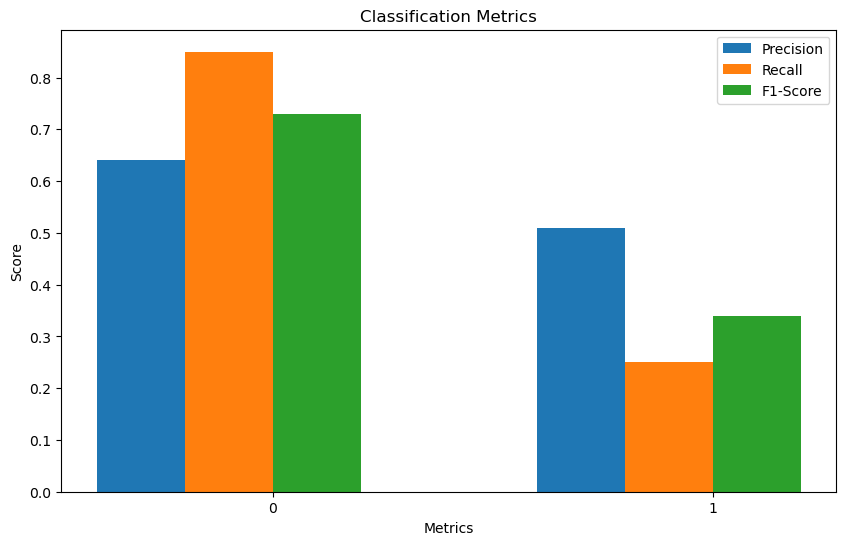

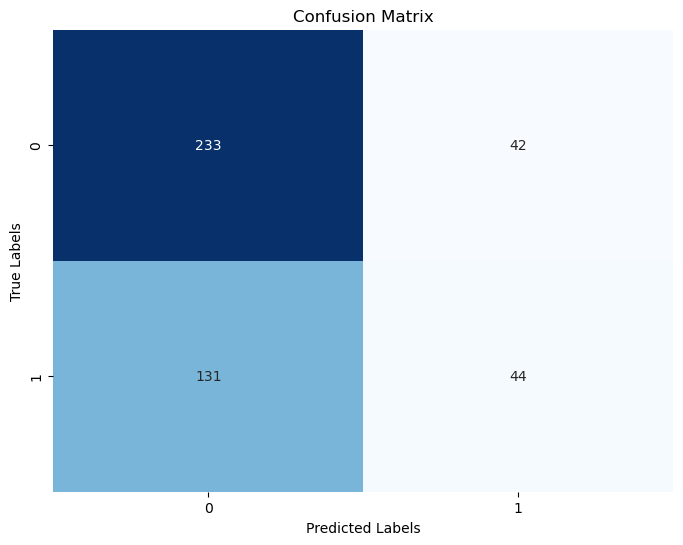

In [149]:
#Evaluation
svc_class_report=classification_report(y_test,svc_pred)
svc_cm=confusion_matrix(y_test,svc_pred)

plot_classification_report(svc_class_report)
plot_confusion_matrix(svc_cm)

accuracy={'Logistics Model':70, 'Random Forest':94, 'KNeighborsClassifier':59, 'Support Vector Machine':62}

In [103]:
X_train.shape

(1050, 6)

In [105]:
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [126]:
deep_model=Sequential()

deep_model.add(Dense(6,activation='relu'))
deep_model.add(Dense(10,activation='relu'))
deep_model.add(Dense(5,activation='relu'))
deep_model.add(Dense(1,activation='sigmoid'))

deep_model.compile(optimizer='adam',loss='binary_crossentropy')

In [127]:
# Fit the model
deep_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 13892.5693 - val_loss: 8853.3086
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9657.4883 - val_loss: 6045.1201
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6801.1978 - val_loss: 3988.6282
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4506.0942 - val_loss: 2466.3328
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2646.2539 - val_loss: 1157.8636
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1101.3047 - val_loss: 0.7195
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7092 - val_loss: 0.7198
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7104 - val_loss: 0.7185
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7100 - val_loss: 0.7172
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7034 - val_loss: 0.7160
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7058 - val_loss: 0.7146
Epoch 12/100
33/33 ━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6873 - val_loss: 0.6772
Epoch 70/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6890 - val_loss: 0.6772
Epoch 71/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6889 - val_loss: 0.6771
Epoch 72/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6934 - val_loss: 0.6771
Epoch 73/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6839 - val_loss: 0.6768
Epoch 74/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6853 - val_loss: 0.6768
Epoch 75/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6888 - val_loss: 0.6768
Epoch 76/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6827 - val_loss: 0.6766
Epoch 77/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6914 - val_loss: 0.6767
Epoch 78/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6879 - val_loss: 0.6766
Epoch 79/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6886 - val_loss: 0.6765
Epoch 80/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.683

In [128]:
losses=pd.DataFrame(deep_model.history.history)

<Axes: >

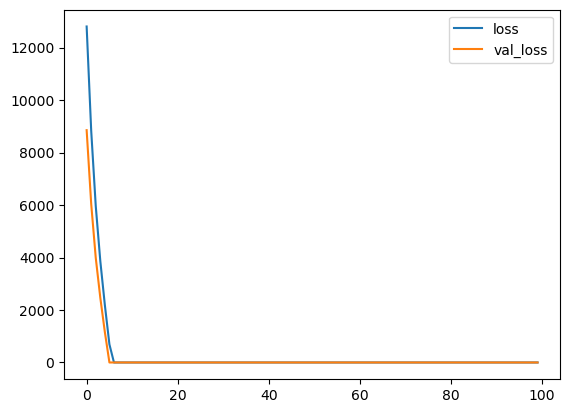

In [129]:
losses.plot()

In [130]:
deep_pred=deep_model.predict (X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [161]:
deep_pred=predicted_classes = (deep_pred > 0.5).astype(int)

In [162]:
#Evaluation
deep_class_report=classification_report(y_test,deep_pred)
deep_cm=confusion_matrix(y_test,deep_pred)

C:\Users\27606\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\27606\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\27606\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_classification_report(class_report):
    # Extract metrics from classification report
    metrics = [metric.split() for metric in class_report.split('\n')[2:-5]]
    metrics_dict = {metric[0]: list(map(float, metric[1:])) for metric in metrics}

    # Extract accuracy if available
    accuracy_line = [line for line in class_report.split('\n') if line.startswith('accuracy')]
    if accuracy_line:
        accuracy = float(accuracy_line[0].split()[1])
    else:
        accuracy = None
        print("Accuracy information not found in classification report.")

    # Prepare data for plotting
    labels = list(metrics_dict.keys())
    precision = [metrics_dict[label][0] for label in labels]
    recall = [metrics_dict[label][1] for label in labels]
    f1_score = [metrics_dict[label][2] for label in labels]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    x = range(len(labels))
    bar_width = 0.2

    ax.bar(x, precision, bar_width, label='Precision')
    ax.bar([i + bar_width for i in x], recall, bar_width, label='Recall')
    ax.bar([i + 2 * bar_width for i in x], f1_score, bar_width, label='F1-Score')
    if accuracy is not None:
        ax.bar([i + 3 * bar_width for i in x], [accuracy] * len(labels), bar_width, label='Accuracy', color='gray')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title('Classification Metrics')
    ax.set_xticks([i + 1.5 * bar_width for i in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

def plot_confusion_matrix(cm):
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
# Assuming class_report and cm are provided as strings or arrays
# class_report = classification_report(y_test, cnn_pred)
# cm = confusion_matrix(y_test, cnn_pred)

# plot_classification_report(class_report)
# plot_confusion_matrix(cm)


Accuracy information not found in classification report.


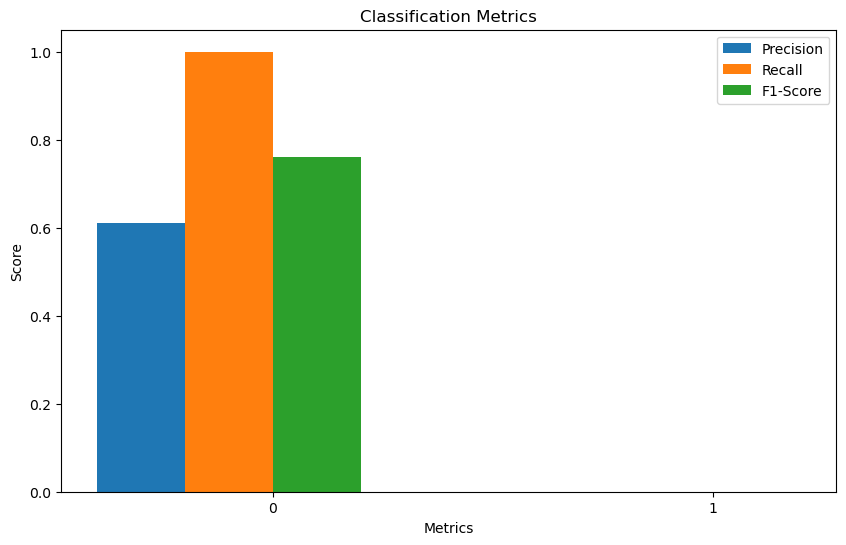

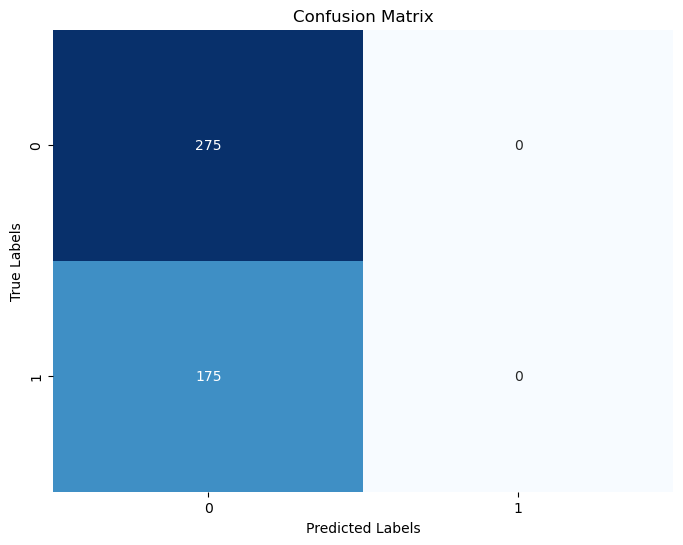

In [164]:
plot_classification_report(deep_class_report)
plot_confusion_matrix(deep_cm)



In [153]:
accuracy={'Logistics Model':70, 'Random Forest':94, 'KNeighborsClassifier':59, 'Support Vector Machine':62, 'Deep Model':61}

In [155]:
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])

<Axes: xlabel='Model', ylabel='Accuracy'>

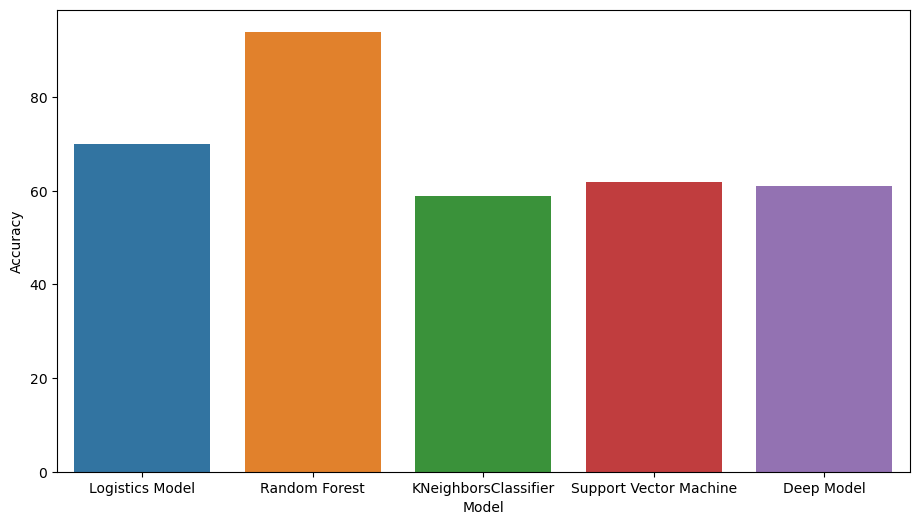

In [160]:
plt.figure(figsize=(11,6))
sns.barplot(x='Model',y='Accuracy',data=accuracy_df)